In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import *

from qiskit.providers.ibmq import least_busy
IBMQ.save_account('9ff1c619f266188a92c5a0444fed8fd525e7889a3e4aee6f0d75e7d94c71ba57dae5e0a3258a28365e8645e1e4bf9c8983d34cfec777358a2c7fa08ee5b6a48b', overwrite=True)

# import basic plot tools
from qiskit.visualization import plot_histogram

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

from qiskit.providers.aer import AerSimulator
import random
import time

In [ ]:
def condition_1(qc, a, b, c, d, e, f, output):
    qc.ccx(a, d, output)
    qc.ccx(a, f, output)
    qc.ccx(b, c, output)
    qc.ccx(b, e, output)
    qc.ccx(c, f, output)
    qc.ccx(d, e, output)

In [ ]:
def condition_2(qc, a, b, c, d, e, f, output):
    qc.ccx(a, b, output)    qc.ccx(c, d, output)
    qc.ccx(e, f, output)
    qc.x(output)

In [ ]:
condition = [0,1,2,3,4,5]

In [ ]:
#trial:
in_qubits = QuantumRegister(6, name = 'inputs')
out_qubits = QuantumRegister(2, name = 'outputs')
final_qubit = QuantumRegister(1, name = 'f')
qc = QuantumCircuit(in_qubits, out_qubits, final_qubit)
condition_1(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[0])
condition_2(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[1])

qc.mct(out_qubits, final_qubit)

condition_2(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[1])
condition_1(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[0])

qc.draw()

In [ ]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [49]:
#full algorithm
in_qubits = QuantumRegister(6, name='inputs')
out_qubits = QuantumRegister(2, name ='out')
final_qubit = QuantumRegister(1, name = 'final')
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(in_qubits, out_qubits, final_qubit, cbits)

def sukoku_oracle(qc, in_qubits, out_qubits, final_qubit):
    condition_1(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[0])
    condition_2(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[1])

    qc.mct(out_qubits, final_qubit)

    condition_2(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[1])
    condition_1(qc, in_qubits[0], in_qubits[1],  in_qubits[2],  in_qubits[3],  in_qubits[4],  in_qubits[5], out_qubits[0])

sukoku_oracle(qc, in_qubits, out_qubits, final_qubit)
qc.draw()

»
inputs_0: ──■────■───────────────────■─────────────────────────────■───────»
            │    │                   │                             │       »
inputs_1: ──┼────┼────■────■─────────■─────────────────────────────■───────»
            │    │    │    │         │                             │       »
inputs_2: ──┼────┼────■────┼────■────┼─────────■───────────────────┼────■──»
            │    │    │    │    │    │         │                   │    │  »
inputs_3: ──■────┼────┼────┼────┼────┼────■────■───────────────────┼────■──»
            │    │    │    │    │    │    │    │                   │    │  »
inputs_4: ──┼────┼────┼────■────┼────┼────■────┼────■──────────────┼────┼──»
            │    │    │    │    │    │    │    │    │              │    │  »
inputs_5: ──┼────■────┼────┼────■────┼────┼────┼────■──────────────┼────┼──»
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌─┴─┐  │    │              │    │  »
   out_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├──┼──┤ X ├──┼────┼─────────■────┼────┼──»
          └───┘└───┘└───┘└───┘└───┘┌─┴─┐└───┘┌─┴─┐┌─┴─┐┌───┐  │  ┌─┴─┐┌─┴─┐»
   out_1: ─────────────────────────┤ X ├─────┤ X ├┤ X ├┤ X ├──■──┤ X ├┤ X ├»
                                   └───┘     └───┘└───┘└───┘┌─┴─┐└───┘└───┘»
   final: ──────────────────────────────────────────────────┤ X ├──────────»
                                                            └───┘          »
 cbits: 6/═════════════════════════════════════════════════════════════════»
                                                                           »
«                                             
«inputs_0: ───────■────■──────────────────────
«                 │    │                      
«inputs_1: ───────┼────┼────■────■────────────
«                 │    │    │    │            
«inputs_2: ───────┼────┼────■────┼────■───────
«                 │    │    │    │    │       
«inputs_3: ───────■────┼────┼────┼────┼────■──
«                 │    │    │    │    │    │  
«inputs_4: ──■────┼────┼────┼────■────┼────■──
«            │    │    │    │    │    │    │  
«inputs_5: ──■────┼────■────┼────┼────■────┼──
«            │  ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
«   out_0: ──┼──┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
«          ┌─┴─┐├───┤└───┘└───┘└───┘└───┘└───┘
«   out_1: ┤ X ├┤ X ├─────────────────────────
«          └───┘└───┘                         
«   final: ───────────────────────────────────
«                                             
« cbits: 6/═══════════════════════════════════
«

In [58]:
#full algorithm
in_qubits = QuantumRegister(6, name='inputs')
out_qubits = QuantumRegister(2, name ='out')
final_qubit = QuantumRegister(1, name = 'final')
cbits = ClassicalRegister(6, name='cbits')
qc = QuantumCircuit(in_qubits, out_qubits, final_qubit, cbits)

qc.initialize([1, -1]/np.sqrt(2), out_qubit)
# Initialize qubits in state |s>
qc.h(in_qubits)
qc.barrier()  # for visual separation
#first iteration
sukoku_oracle(qc, in_qubits, out_qubits, final_qubit)
qc.barrier()
qc.append(diffuser(6), [0,1,2,3,4,5])
#second iteration
sukoku_oracle(qc, in_qubits, out_qubits, final_qubit)
qc.barrier()
qc.append(diffuser(6), [0,1,2,3,4,5])

display(qc.draw()
qc.measure(in_qubits, cbits)

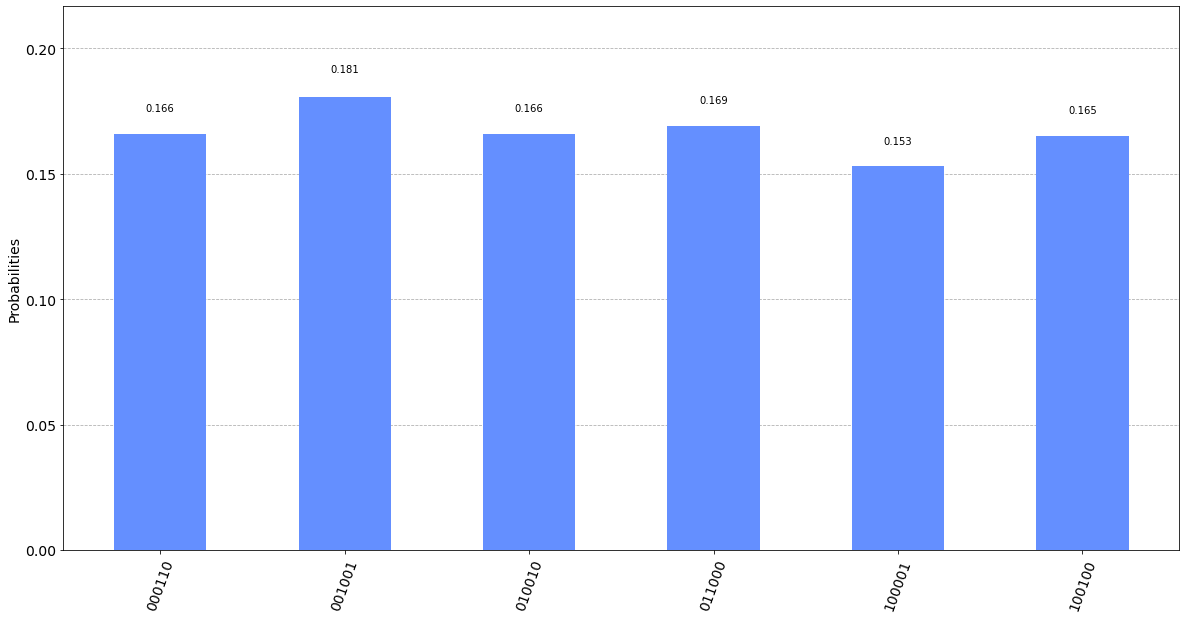

In [62]:
# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
qobj = assemble(transpiled_qc)
result = aer_sim.run(qobj).result()
plot_histogram(result.get_counts(), figsize = (20,10) )


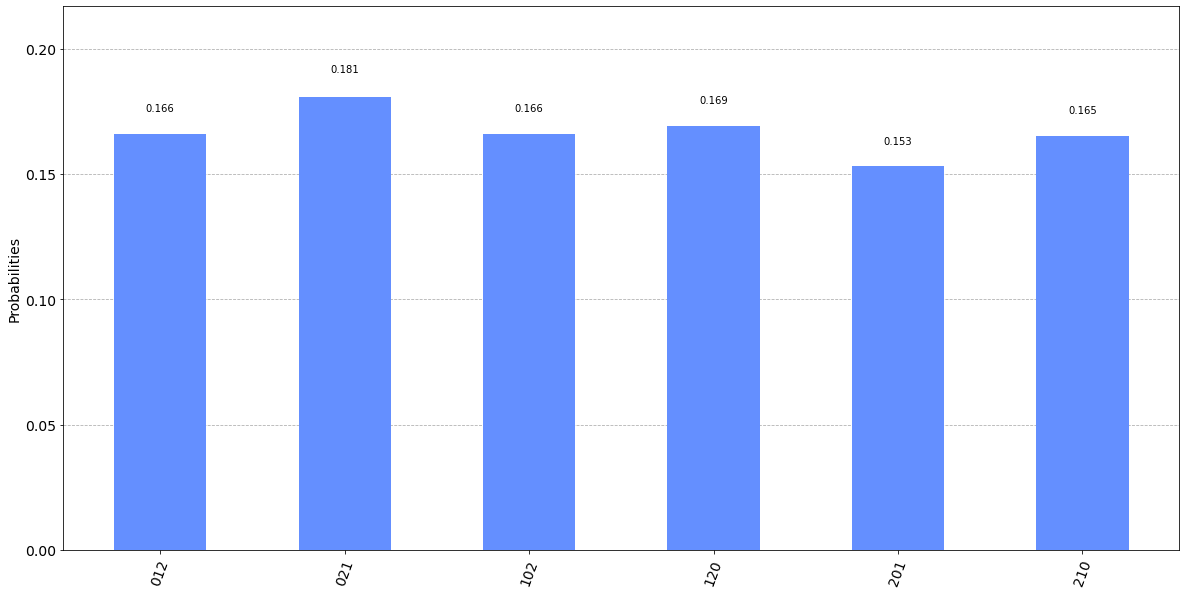

In [117]:
dictionary = result.get_counts()

new_key =['012', '021', '102', '120', '201', '210']

dictionary[new_key[0]] = dictionary.pop('000110')
dictionary[new_key[1]] = dictionary.pop('001001')
dictionary[new_key[2]] = dictionary.pop('010010')
dictionary[new_key[3]] = dictionary.pop('011000')
dictionary[new_key[4]] = dictionary.pop('100001')
dictionary[new_key[5]] = dictionary.pop('100100')

plot_histogram(dictionary, figsize = (20,10) )

NameError: name 'dictionaty' is not defined